In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Assuming you have a dataset (CSV file) with relevant sales and advertising data
sales_data = pd.read_csv('/content/advertising.csv')

# Display basic information about the dataset
print(sales_data.info())

# Explore descriptive statistics
print(sales_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


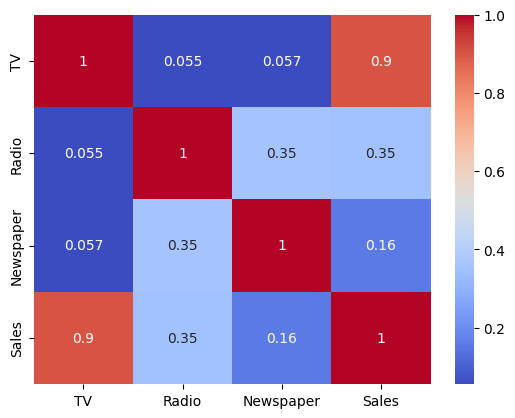

In [3]:
# Handle missing values if any
sales_data.dropna(inplace=True)

# Explore correlations between features
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [7]:
# Select relevant features for prediction
X = sales_data[['TV', 'Radio', 'Newspaper']]

# Target variable (Sales)
y = sales_data['Sales']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 2.91
R-squared: 0.91


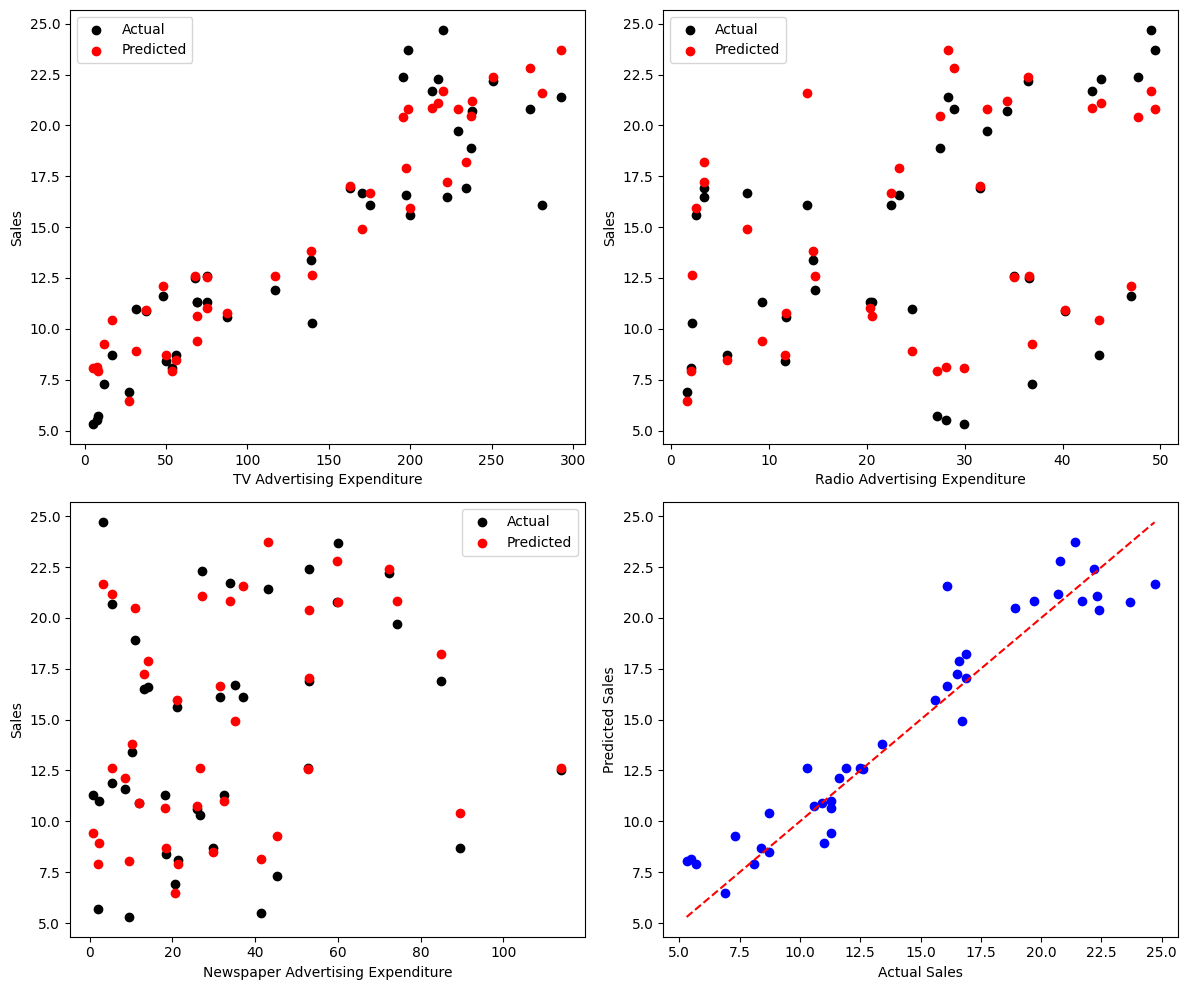

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# TV scatter plot
axes[0, 0].scatter(X_test['TV'], y_test, color='black', label='Actual')
axes[0, 0].scatter(X_test['TV'], y_pred, color='red', label='Predicted')
axes[0, 0].set_xlabel('TV Advertising Expenditure')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].legend()

# Radio scatter plot
axes[0, 1].scatter(X_test['Radio'], y_test, color='black', label='Actual')
axes[0, 1].scatter(X_test['Radio'], y_pred, color='red', label='Predicted')
axes[0, 1].set_xlabel('Radio Advertising Expenditure')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].legend()

# Newspaper scatter plot
axes[1, 0].scatter(X_test['Newspaper'], y_test, color='black', label='Actual')
axes[1, 0].scatter(X_test['Newspaper'], y_pred, color='red', label='Predicted')
axes[1, 0].set_xlabel('Newspaper Advertising Expenditure')
axes[1, 0].set_ylabel('Sales')
axes[1, 0].legend()

# Final comparison scatter plot
axes[1, 1].scatter(y_test, y_pred, color='blue')
axes[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
axes[1, 1].set_xlabel('Actual Sales')
axes[1, 1].set_ylabel('Predicted Sales')

plt.tight_layout()
plt.show()
